<a href="https://colab.research.google.com/github/abdullatifm1127/PCVK_GANJIL_2025/blob/main/Week3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


 Mengubah tingkat kecerahan citra 
----------------------------------
Masukkan nilai kecerahan: 50


/tmp/ipython-input-3637025472.py:19: RuntimeWarning: overflow encountered in scalar add
  brightness_image[y,x,c] = np.clip(original[y,x,c] + brightness, 0, 255)


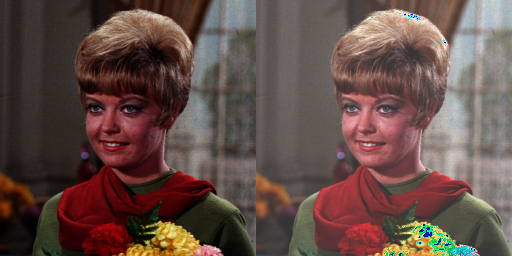

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

print(' Mengubah tingkat kecerahan citra ')
print('----------------------------------')

try:
    brightness = int(input('Masukkan nilai kecerahan: '))
except ValueError:
    print('Error, not a number')

original = cv2.imread('/content/drive/MyDrive/Tugas PCVK/female.tiff')
brightness_image = np.zeros(original.shape, original.dtype)

for y in range(original.shape[0]):
    for x in range(original.shape[1]):
        for c in range(original.shape[2]):
            brightness_image[y,x,c] = np.clip(original[y,x,c] + brightness, 0, 255)

# cara simple tanpa for loop
# brightness_image = cv2.convertScaleAbs(original,beta=brightness)

final_frame = cv2.hconcat((original, brightness_image))
cv2_imshow(final_frame)

**TUGAS PRAKTIKUM D1**

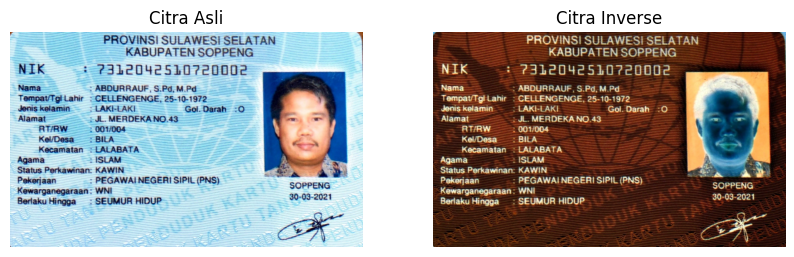

In [ ]:
import cv2
import matplotlib.pyplot as plt

img_path = "/content/drive/MyDrive/Tugas PCVK/KTP.jpeg"

image = cv2.imread(img_path)

image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

inverse_img = 255 - image_rgb

plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.imshow(image_rgb)
plt.title("Citra Asli")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(inverse_img)
plt.title("Citra Inverse")
plt.axis("off")

plt.show()


 Mengubah tingkat kecerahan citra 
----------------------------------
Masukkan nilai kecerahan [-255 - 255]: 50
Masukkan nilai kontras [1.0 - 3.0]: 2


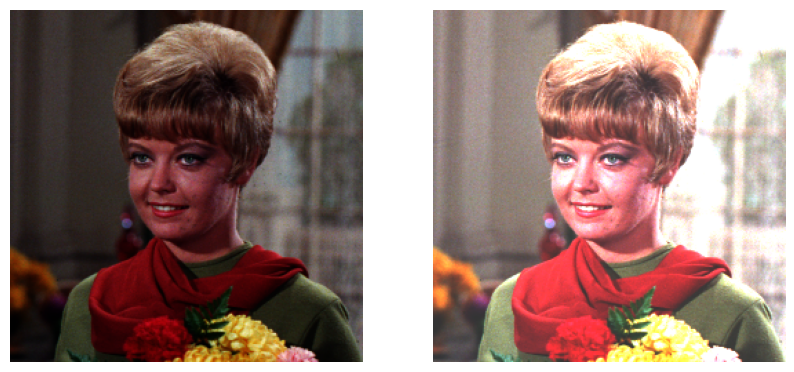

In [ ]:
import cv2
import matplotlib.pyplot as plt


print(' Mengubah tingkat kecerahan citra ')
print('----------------------------------')

try:
    brightness = int(input('Masukkan nilai kecerahan [-255 - 255]: '))
    contrast = float(input('Masukkan nilai kontras [1.0 - 3.0]: '))
except ValueError:
    print('Error, not a number')

img_path = "/content/drive/MyDrive/Tugas PCVK/female.tiff"

image = cv2.imread(img_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

adjusted = cv2.convertScaleAbs(image_rgb, alpha=contrast, beta=brightness)

plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.imshow(image_rgb)
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(adjusted)
plt.axis("off")

plt.show()

 Mengubah tingkat kecerahan citra dengan Transformasi Log: 
----------------------------------
Masukkan nilai kecerahan: 50


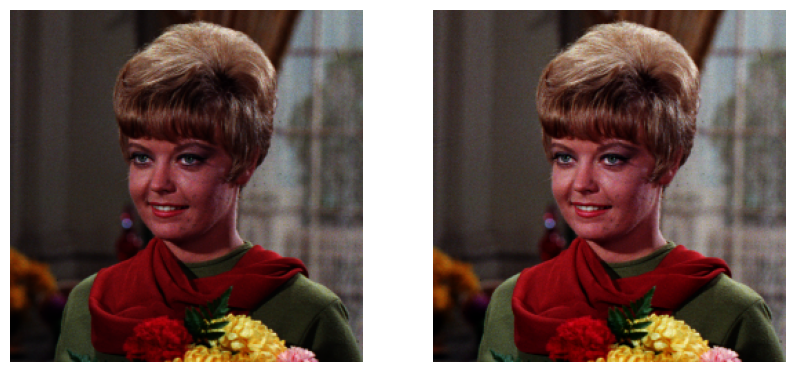

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

print(' Mengubah tingkat kecerahan citra dengan Transformasi Log: ')
print('----------------------------------')

try:
    brightness = int(input('Masukkan nilai kecerahan: '))

except ValueError:
    print('Error, not a number')

img_path = "/content/drive/MyDrive/Tugas PCVK/female.tiff"

image = cv2.imread(img_path)

image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

normalized = image_rgb / 255.0

log_transformed = c * np.log(1 + normalized)

log_transformed = cv2.normalize(log_transformed, None, 0, 255, cv2.NORM_MINMAX)
log_transformed = np.uint8(log_transformed)

plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.imshow(image_rgb)
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(log_transformed)
plt.axis("off")

plt.show()


a. Averaging


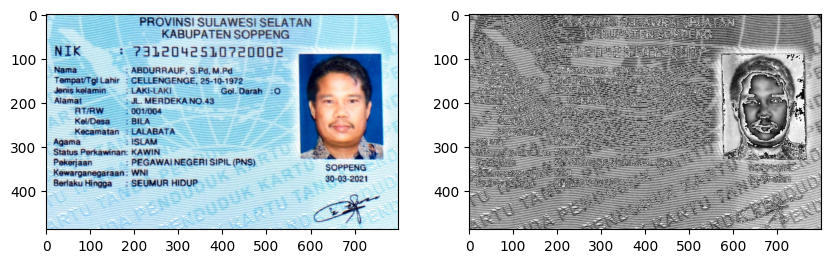

b. Lightness


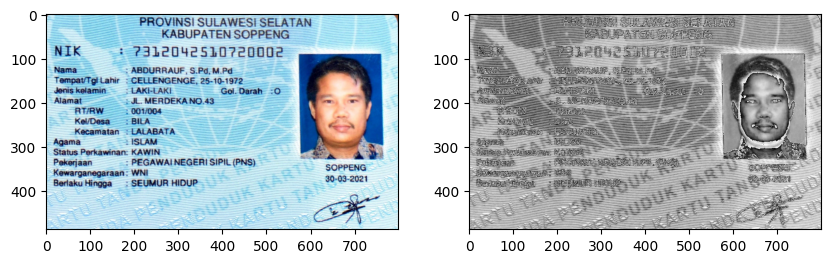

c. Luminance


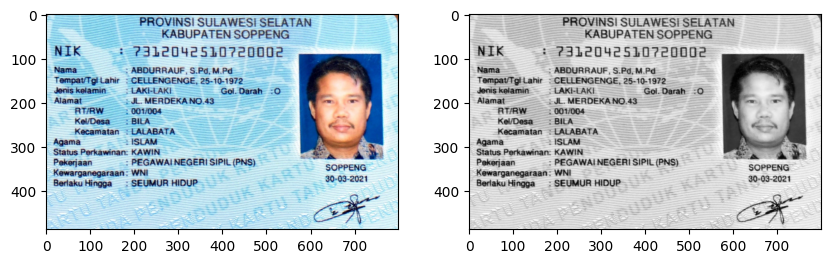

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img_path = "/content/drive/MyDrive/Tugas PCVK/KTP.jpeg"

image = cv2.imread(img_path)

image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

R = image_rgb[:,:,0]
G = image_rgb[:,:,1]
B = image_rgb[:,:,2]

gray_avg = ((R + G + B) / 3).astype(np.uint8)

gray_light = ((np.maximum(np.maximum(R,G),B) + np.minimum(np.minimum(R,G),B)) / 2).astype(np.uint8)

gray_lum = (0.299*R + 0.587*G + 0.114*B).astype(np.uint8)


# a. Averaging
print("a. Averaging")
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(image_rgb)
plt.subplot(1,2,2)
plt.imshow(gray_avg, cmap="gray")
plt.show()

print("b. Lightness")
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(image_rgb)
plt.subplot(1,2,2)
plt.imshow(gray_light, cmap="gray")
plt.show()

print("c. Luminance")
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(image_rgb)
plt.subplot(1,2,2)
plt.imshow(gray_lum, cmap="gray")
plt.show()


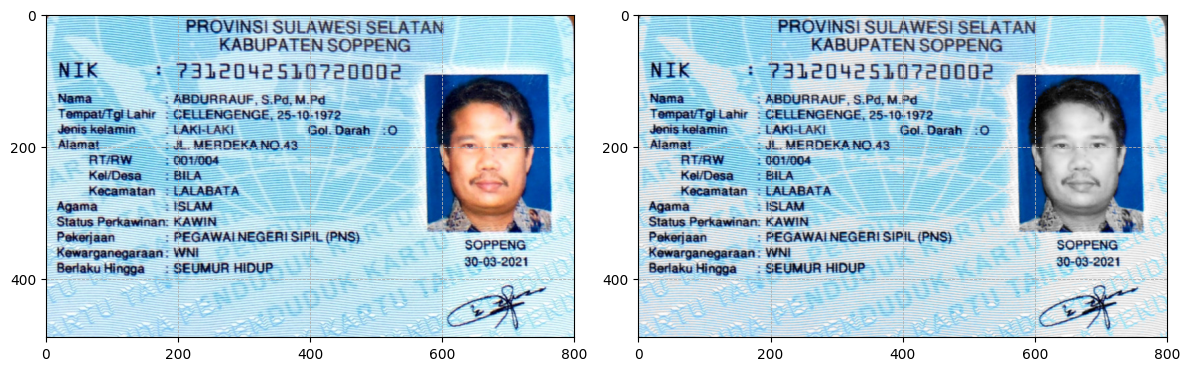

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread("/content/drive/MyDrive/Tugas PCVK/KTP.jpeg")

hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

lower_blue = np.array([90, 50, 50])
upper_blue = np.array([130, 255, 255])

mask = cv2.inRange(hsv, lower_blue, upper_blue)

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray_bgr = cv2.cvtColor(gray, cv2.COLOR_GRAY2BGR)

result = np.where(mask[:, :, None] == 255, img, gray_bgr)

h, w = img.shape[:2]
step = 200
xticks = np.arange(0, w+1, step)
yticks = np.arange(0, h+1, step)

plt.figure(figsize=(12,6))

ax1 = plt.subplot(1,2,1)
ax1.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
ax1.set_xticks(xticks)
ax1.set_yticks(yticks)
ax1.set_xlim([0, w])
ax1.set_ylim([h, 0])
ax1.grid(True, linestyle='--', linewidth=0.6)

ax2 = plt.subplot(1,2,2)
ax2.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
ax2.set_xticks(xticks)
ax2.set_yticks(yticks)
ax2.set_xlim([0, w])
ax2.set_ylim([h, 0])
ax2.grid(True, linestyle='--', linewidth=0.6)

plt.tight_layout()
plt.show()


**D2 Oerasi Aritmatika dan Logika**

Gamma Correction pada citra
----------------------------------
Masukkan nilai Gamma: 3


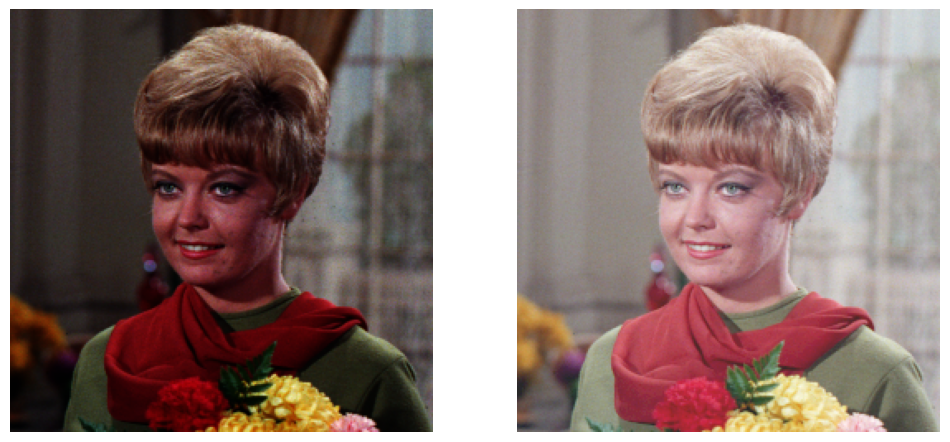

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

print("Gamma Correction pada citra")
print("----------------------------------")

img_path = "/content/drive/MyDrive/Tugas PCVK/female.tiff"
image = cv2.imread(img_path)

try:
    gamma = float(input('Masukkan nilai Gamma: '))
except ValueError:
    print('Error, bukan angka')
    gamma = 1.0

gamma_corrected = np.power(image / 255.0, 1.0 / gamma)

gamma_corrected = np.uint8(gamma_corrected * 255)

plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(cv2.cvtColor(gamma_corrected, cv2.COLOR_BGR2RGB))
plt.axis("off")

plt.show()


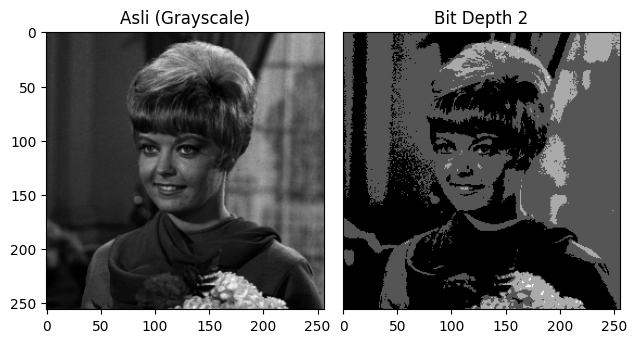

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

bit_dept = 2
level = 255 / (pow(2, bit_dept) - 1)

original = cv2.imread('/content/drive/MyDrive/Tugas PCVK/female.tiff', cv2.IMREAD_GRAYSCALE)
if original is None:
    raise FileNotFoundError("Gambar tidak ditemukan!")

quantized = np.round(original / level) * level
quantized = np.uint8(quantized)

plt.subplot(1, 2, 1)
plt.imshow(original, cmap='gray')
plt.title("Asli (Grayscale)")

plt.subplot(1, 2, 2)
plt.imshow(quantized, cmap='gray')
plt.title(f"Bit Depth {bit_dept}")

plt.gca().yaxis.set_visible(False)

plt.tight_layout()
plt.show()

In [36]:
import os
import glob
import cv2
import numpy as np
from math import log10
import matplotlib.pyplot as plt

cv2_img = []
for img in glob.glob('/content/drive/MyDrive/Tugas PCVK/images/noises/*.jpg'):
  n = cv2.imread(img)
  cv2_img.append(n)

def imread_rgb(path):
  """Baca gambar sebagai RGB uint8."""
  bgr = cv2.imread(path, cv2.IMREAD_UNCHANGED)
  if bgr is None:
      raise FileNotFoundError(f"Gambar tidak ditemukan: {path}")
  # jika grayscale -> ubah ke 3 channel
  if len(bgr.shape) == 2:
      bgr = cv2.cvtColor(bgr, cv2.COLOR_GRAY2BGR)
  return cv2.cvtColor(bgr, cv2.COLOR_BGR2RGB)

def save_rgb(path, rgb):
  """Simpan image RGB (uint8) menggunakan cv2 (menerima BGR)."""
  bgr = cv2.cvtColor(rgb, cv2.COLOR_RGB2BGR)
  cv2.imwrite(path, bgr)

def psnr_uint8(ref, dst, max_val=255.0):
  """Hitung PSNR antara dua citra uint8 RGB (atau grayscale)"""
  # pastikan tipe float untuk perhitungan
  ref_f = ref.astype(np.float64)
  dst_f = dst.astype(np.float64)
  mse = np.mean((ref_f - dst_f) ** 2)
  if mse == 0:
      return float('inf')
  return 10.0 * log10((max_val ** 2) / mse)

# ----- Load file list -----
noises_glob = '/content/drive/MyDrive/Tugas PCVK/images/noises/*.jpg' # Define noises_glob
ref_path = '/content/drive/MyDrive/Tugas PCVK/images/reference/reference.jpg' # Define ref_path
out_dir = '/content/drive/MyDrive/Tugas PCVK/images/output_average' # Define out_dir

noisy_paths = sorted(glob.glob(noises_glob))
if len(noisy_paths) == 0:
    raise FileNotFoundError(f"Tidak menemukan citra noisy dengan pattern: {noises_glob}")

print(f"Menemukan {len(noisy_paths)} citra noisy. Menggunakan file pertama pada urutan sorted().")

# baca referensi
ref_rgb = imread_rgb(ref_path)
h_ref, w_ref = ref_rgb.shape[:2]

# konversi semua noisy ke float untuk akumulasi (tapi bacanya satu per satu agar memory efisien)
# namun kita butuh memastikan semua noisy punya ukuran sama. Jika tidak, kita resize ke ukuran referensi.
def load_and_prepare(path, target_shape):
    img = imread_rgb(path)
    if img.shape[:2] != target_shape:
        img = cv2.resize(img, (target_shape[1], target_shape[0]), interpolation=cv2.INTER_AREA)
    return img

# ----- Fungsi utama: average dan hitung PSNR -----
def average_and_psnr(noisy_paths, ref_rgb, Ns=[10,20,40,80,100], out_dir="output_average"):
    results = []
    target_shape = ref_rgb.shape[:2]
    total_noisy = len(noisy_paths)

    # Create output directory if it doesn't exist
    os.makedirs(out_dir, exist_ok=True)

    for N in Ns:
        if N > total_noisy:
            print(f"WARNING: diminta N={N} tetapi hanya tersedia {total_noisy} citra. Menggunakan {total_noisy}.")
            N_use = total_noisy
        else:
            N_use = N

        # Ambil N pertama (deterministic). Jika Anda ingin random subset, ganti dengan random.sample
        selected = noisy_paths[:N_use]

        # akumulasi sebagai float64 untuk presisi
        acc = np.zeros((target_shape[0], target_shape[1], 3), dtype=np.float64)
        for p in selected:
            img = load_and_prepare(p, target_shape)
            acc += img.astype(np.float64)

        avg = (acc / N_use).round().clip(0,255).astype(np.uint8)

        # hitung PSNR (bandingkan avg dengan ref_rgb)
        psnr_val = psnr_uint8(ref_rgb, avg, max_val=255.0)

        # simpan hasil rata-rata
        out_name = os.path.join(out_dir, f"average_N{N_use}.png")
        save_rgb(out_name, avg)

        results.append({
            "N": N_use,
            "psnr_db": psnr_val,
            "out_path": out_name
        })
        print(f"N={N_use:3d}  -> PSNR = {psnr_val:.4f} dB  (saved: {out_name})")

    return results

# ----- Jalankan perhitungan untuk N yang diinginkan -----
if __name__ == "__main__":
    Ns = [10, 20, 40, 80, 100]
    results = average_and_psnr(noisy_paths, ref_rgb, Ns=Ns, out_dir=out_dir)

    # Tampilkan hasil ringkasan dalam bentuk tabel sederhana
    print("\nHasil ringkasan:")
    print("{:>6} | {:>10} | {}".format("No", "JumlahCitra", "PSNR (dB)"))
    print("-"*34)
    for i, r in enumerate(results, start=1):
        print("{:>6} | {:>10} | {:>8.4f}".format(i, r["N"], r["psnr_db"]))

    # (Opsional) visualisasi ringkas: tampilkan original, mask (tidak relevan di sini), dan semua average
    n_results = len(results)
    # buat figure dinamis: 1 row, 2 + n_results columns
    cols = 2 + n_results
    plt.figure(figsize=(3*cols, 4))
    # Original
    plt.subplot(1, cols, 1)
    plt.imshow(ref_rgb)
    plt.axis("off")
    plt.title("Original (ref)")

    # placeholder mask (kosong) supaya layout mirip tabel Anda
    plt.subplot(1, cols, 2)
    plt.axis("off")
    plt.title("Mask placeholder")

    # masing-masing average
    for i, r in enumerate(results):
        img = imread_rgb(r["out_path"])
        plt.subplot(1, cols, 3 + i)
        plt.imshow(img)
        plt.axis("off")
        plt.title(f"N={r['N']}\nPSNR={r['psnr_db']:.2f} dB")

    plt.tight_layout()
    plt.show()

FileNotFoundError: Tidak menemukan citra noisy dengan pattern: /content/drive/MyDrive/Tugas PCVK/images/noises/*.jpg

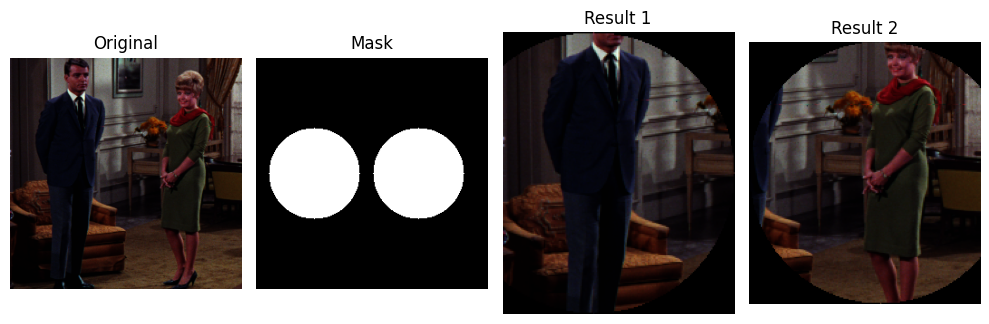

In [26]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Baca gambar asli
img = cv2.imread("/content/drive/MyDrive/Tugas PCVK/couple.tiff")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # konversi ke RGB

# Ukuran gambar
h, w = img.shape[:2]

# Buat mask kosong (hitam)
mask = np.zeros(img.shape[:2], dtype="uint8")

# Lingkaran untuk orang kiri
mask1 = mask.copy()
cv2.circle(mask1, (int(w*0.25), int(h*0.5)), 100, 255, -1)

# Lingkaran untuk orang kanan
mask2 = mask.copy()
cv2.circle(mask2, (int(w*0.7), int(h*0.5)), 100, 255, -1)

# Gabungkan kedua lingkaran ke dalam satu canvas hitam
mask_combined = cv2.merge([mask1, mask2, mask])  # hanya untuk visual

# Aplikasikan masking
masked1 = cv2.bitwise_and(img, img, mask=mask1)
masked2 = cv2.bitwise_and(img, img, mask=mask2)

# Crop hasil sesuai lingkaran agar rapi
def crop_to_circle(masked, mask):
    coords = cv2.findNonZero(mask)
    x, y, w, h = cv2.boundingRect(coords)
    return masked[y:y+h, x:x+w]

res1 = crop_to_circle(masked1, mask1)
res2 = crop_to_circle(masked2, mask2)

# Tampilkan hasil sesuai contoh
plt.figure(figsize=(10,4))

# Gambar asli
plt.subplot(1,4,1)
plt.imshow(img)
plt.axis("off")
plt.title("Original")

# Mask (dua lingkaran putih)
mask_display = np.zeros_like(img)
cv2.circle(mask_display, (int(w*0.25), int(h*0.5)), 50, (255,255,255), -1)
cv2.circle(mask_display, (int(w*0.7), int(h*0.5)), 50, (255,255,255), -1)

plt.subplot(1,4,2)
plt.imshow(mask_display)
plt.axis("off")
plt.title("Mask")

# Hasil lingkaran kiri
plt.subplot(1,4,3)
plt.imshow(res1)
plt.axis("off")
plt.title("Result 1")

# Hasil lingkaran kanan
plt.subplot(1,4,4)
plt.imshow(res2)
plt.axis("off")
plt.title("Result 2")

plt.tight_layout()
plt.show()
